<a href="https://colab.research.google.com/github/Arunav07/CRISTL-Project-1/blob/Atharva_D's-Branch/TRY_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [34]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob
import natsort
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# import tensorflow.keras.utils.to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import UnidentifiedImageError
import skimage.io
import skimage.color
import skimage.filters
import io
from skimage import data, io, img_as_ubyte
from skimage.filters import threshold_multiotsu
# from tensorflow.python.keras.preprocessing.image import img_to_array
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pathlib

In [29]:
Labels_Data = pd.read_csv("/content/AutomatedLabelFile.csv")
Labels_Data.shape

(663, 11)

In [30]:
np.array(Labels_Data).shape

(663, 11)

In [31]:
Images = glob.glob("/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/*.jpg")

In [32]:
Image_array=[]
for i in Images:
  img = image.load_img(i,target_size=(256,256,3))
  img = image.img_to_array(img)
  img = img/255
  Image_array.append(img)
Image_Data = np.array(Image_array)
Image_Data.shape

(663, 256, 256, 3)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(Image_Data, Labels_Data, random_state=42, test_size=0.2)

In [35]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(11, activation='sigmoid'))

In [36]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
17/17 [==============================] - 162s 9s/step - loss: 1.0076 - accuracy: 0.0981 - val_loss: 1.5030 - val_accuracy: 0.0000e+00
Epoch 2/5
17/17 [==============================] - 144s 9s/step - loss: 0.9182 - accuracy: 0.1151 - val_loss: 1.1011 - val_accuracy: 0.0000e+00
Epoch 3/5
17/17 [==============================] - 156s 9s/step - loss: 0.8553 - accuracy: 0.1245 - val_loss: 0.8672 - val_accuracy: 0.0000e+00
Epoch 4/5
17/17 [==============================] - 161s 9s/step - loss: 0.7954 - accuracy: 0.1377 - val_loss: 0.8391 - val_accuracy: 0.0000e+00
Epoch 5/5
17/17 [==============================] - 143s 8s/step - loss: 0.7606 - accuracy: 0.1132 - val_loss: 0.8371 - val_accuracy: 0.0000e+00


In [38]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

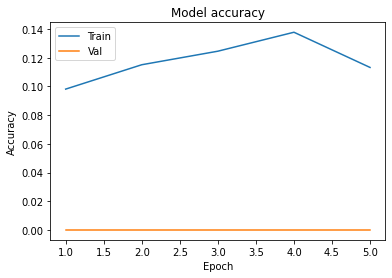

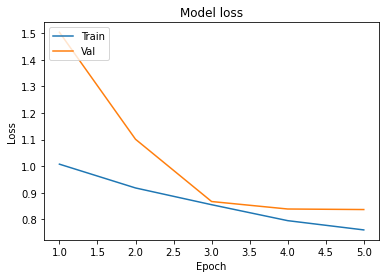

In [39]:
plot_learningCurve(history, 5)

In [40]:
classes = ['truck',	'person',	'autorickshaw',	'car'	,'motorcycle',	'rider',	'bus'	,'bicycle',	'vehicle_fallback'	,'traffic_sign',	'animal'] 

In [44]:
def get_laebls(y):
  li = len(np.where(y > 0.60)[1])
  pred = np.argsort(y)[0][:-li:-1]
  labels = []
  for i in pred:
    labels.append(classes[i])

  ## if labels more than 4
  ## drop last
  if len(labels) > 4:
    return labels[:4]
  else:  
    return labels

vehicle_fallback, animal, motorcycle, rider


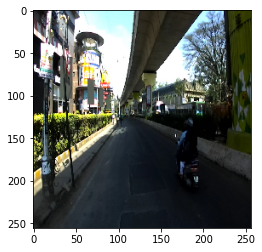

In [45]:
img_width = 256
img_height = 256

img = image.load_img('/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/0001352.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

#classes = data.columns[3:]
y_prob = model.predict(img)
out = get_laebls(y_prob)
print(*out, sep=', ')